In [1]:
import os

In [2]:
this_directory = os.getcwd()
os.chdir('../final')

In [3]:
!python -m tournament.runner image_jurgen_agent jurgen_agent -r record.mp4 -s data.pkl -f 10

Match results [0, 0]


c:\Users\william.heidel\.conda\envs\supertuxcart\lib\site-packages\torch\nn\modules\module.py:1520: UserWarning: at::frobenius_norm is deprecated and it is just left for JIT compatibility. It will be removed in a future PyTorch release. Please use `linalg.vector_norm(A, 2., dim, keepdim)` instead (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\LinearAlgebra.cpp:3005.)
  return forward_call(*args, **kwargs)


In [4]:
import pickle

# Open the .pkl file for reading in binary mode
with open('data.pkl', 'rb') as f:
    # Load the object from the file
    data = pickle.load(f)

# Now, 'data' contains the object loaded from the .pkl file


In [5]:
os.chdir(this_directory)

In [6]:
import pystk
config = pystk.GraphicsConfig.hd()
config.screen_width = 128
config.screen_height = 96
pystk.init(config)

In [7]:
from PIL import Image
from IPython.display import display
import numpy as np
import sys
import matplotlib.pyplot as plt

In [8]:
TRACK_NAME = 'icy_soccer_field'
num_player=2

RaceConfig = pystk.RaceConfig
race_config = RaceConfig(track=TRACK_NAME, mode=RaceConfig.RaceMode.SOCCER, num_kart=2 * num_player)
race_config.players[0].controller = pystk.PlayerConfig.Controller.AI_CONTROL
race = pystk.Race(race_config)

race.start()
n_steps = 100
for step in range(n_steps):
    race.step() # Use an optional action and set controller to pystk.PlayerConfig.
    #˓→Controller.PLAYER_CONTROL
    # Use race.render_data[0].image
    # Use race.render_data[0].depth
    # Use race.render_data[0].instance
    rendered_data = race.render_data[0]
    image_data = rendered_data.image
    image = Image.fromarray(image_data)
    if step % 10 == 0:
        pass #display(image)
race.stop()
#del race

In [10]:
race.WorldState

AttributeError: 'pystk.Race' object has no attribute 'WorldState'

In [9]:
objects_in_image = race.render_data[0].instance >> 24

In [10]:
race.render_data

In [11]:
instance = race.render_data[0].instance

In [12]:
with np.printoptions(threshold=sys.maxsize, linewidth=np.inf):
    print(objects_in_image)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

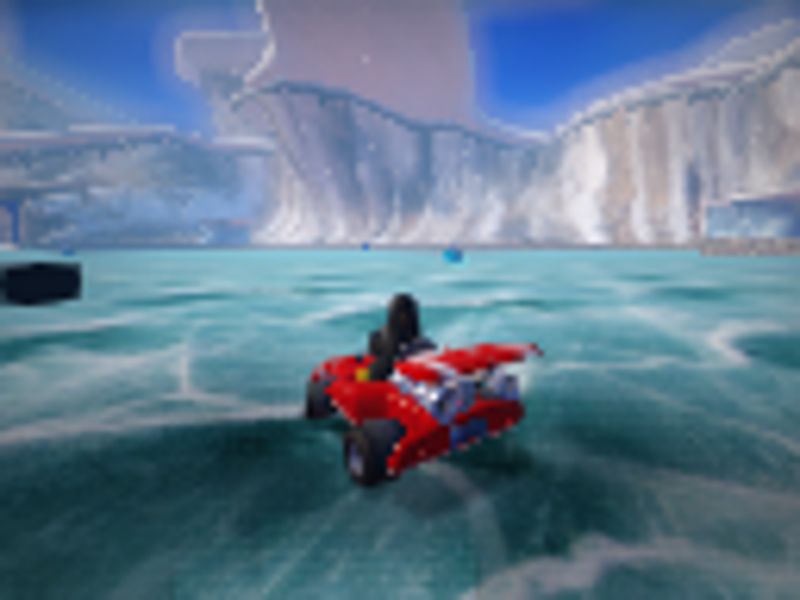

In [13]:
image_resize = image.resize((800, 600))
image_resize

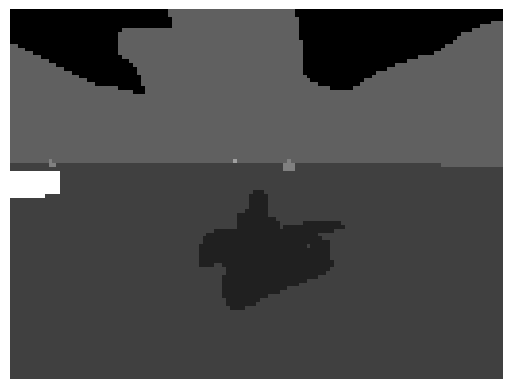

In [14]:
plt.imshow(objects_in_image, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

In [15]:
puck_mask = objects_in_image == 8

In [16]:
indices = np.where(objects_in_image == 8)

min_row = min(indices[0])
max_row = max(indices[0])
min_col = min(indices[1])
max_col = max(indices[1])

puck_array = np.array([[min_col, min_row, max_col+1, max_row+1]], dtype='uint16')


In [17]:
puck_array

array([[ 0, 42, 13, 49]], dtype=uint16)

In [18]:
image.save('image_test.jpg')

In [19]:
np.savez_compressed('image_test.npz', puck=puck_array)

In [20]:
plt.imsave('image_test.png', objects_in_image, cmap='gray')

In [21]:
del race

In [22]:
pystk.clean()

In [23]:
nfo = np.load('image_test.npz')
nfo

NpzFile 'image_test.npz' with keys: puck

In [24]:
nfo['puck']

array([[ 0, 42, 13, 49]], dtype=uint16)